# table group and pivot methods
These methods are a powerful way to summarize a data set along chosen dimensions

In [1]:
from datascience import *

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Example
[See Inferential Thinking](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html?highlight=group)

[Ben & Jerry data visualization](https://benjerry.heshlindsdataviz.com)

In [3]:
IC_data = Table.read_table('data/BenJerryData.csv')
IC_data

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream
Peanut Butter Cup,470,33,180,36,9,peanut butter
Chubby Hubby,460,28,220,35,10,vanilla
Peanut Butter World,460,32,190,37,7,chocolate
Oat of This Swirled,420,26,150,41,5,vanilla
Everything But The...,420,26,90,40,7,chocolate
Gimmie S'more,410,24,180,45,6,vanilla
New York Super Fudge Chunk,410,26,70,39,7,chocolate
Chunky Monkey,400,25,50,41,6,vanilla
The Tonight Dough,400,22,135,47,6,vanilla
Urban Bourbon,400,22,95,44,7,caramal


### .group

Look at base ice creams

In [4]:
IC_data.group('base ice cream')

base ice cream,count
caramal,1
chocolate,3
peanut butter,1
vanilla,5


In [ ]:
IC_data.group('base ice cream').sort('count', descending=True).barh('base ice cream')

In [15]:
IC_data.pivot('Flavor','fat (g)')

fat (g),Chubby Hubby,Chunky Monkey,Everything But The...,Gimmie S'more,New York Super Fudge Chunk,Oat of This Swirled,Peanut Butter Cup,Peanut Butter World,The Tonight Dough,Urban Bourbon
22,0,0,0,0,0,0,0,0,1,1
24,0,0,0,1,0,0,0,0,0,0
25,0,1,0,0,0,0,0,0,0,0
26,0,0,1,0,1,1,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,1,0,0
33,0,0,0,0,0,0,1,0,0,0


### Another example

In [5]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


### .group

In [6]:
counts = more_cones.group('Price').sort('count', descending=True)
counts

Price,count
5.25,3
4.75,2
3.55,1


In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

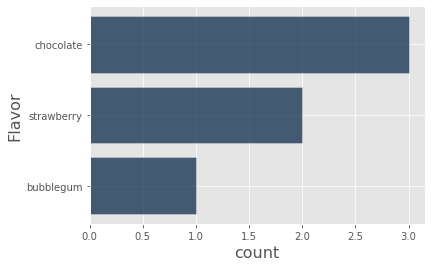

In [8]:
more_cones.group('Flavor').sort('count', descending=True).barh('Flavor')

In [9]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


### .pivot
Demonstrated below. .pivot is a table method which takes two column and creates a new table which contains all combinations of the two column values

In [10]:
more_cones.pivot('Color', 'Flavor')

Flavor,dark brown,light brown,pink
bubblegum,0,0,1
chocolate,2,1,0
strawberry,0,0,2


In [11]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
full_census_table = Table.read_table(data)
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
census = partial_census_table.relabeled('SEX', 'GENDER').relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020')
census

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [14]:
census.group('GENDER', np.mean)

GENDER,AGE mean,2010 mean,2020 mean
0,59.3039,6.06524e+06,6.46047e+06
1,59.3039,2.98191e+06,3.18149e+06
2,59.3039,3.08333e+06,3.27898e+06


In [ ]:
census.where('GENDER',0).select(1,2,3).group('AGE',sum)

In [ ]:
census.where('GENDER',0).select(1,2,3).where('AGE',are.below(99)).group('AGE',sum).plot('AGE')

In [ ]:
census = census.where('AGE',are.below(99))
totals = census.pivot( 'GENDER', 'AGE', values='2010', collect=sum)
totals

In [ ]:
totals.plot('AGE')